# Which is the period with lowest price for apartments in Seattle airbnb and what are the busiest times of the year?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
%matplotlib inline


calendar=pd.read_csv("calendar.csv")
listings=pd.read_csv("listings.csv")
reviews=pd.read_csv("reviews.csv")


Analyzing calendar's dataframe, checking number of rows and columns and columns with missing/nonmissing values

In [2]:
print("Number of rows in calendar table is :",calendar.shape[0])
print("Number of columns in calendar table is :",calendar.shape[1])
no_nulls=set(calendar.dropna().columns)
print("Columns in calendar table with no missing values are :",no_nulls)
most_nulls_cols=set(calendar.columns[calendar.isnull().mean()>0.75])
print("Columns in calendar table with most missing values :",most_nulls_cols)
calendar.head()

Number of rows in calendar table is : 1393570
Number of columns in calendar table is : 4
Columns in calendar table with no missing values are : {'listing_id', 'price', 'date', 'available'}
Columns in calendar table with most missing values : set()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In order to get the mean price values for all listings for different months of the year we need to convert price from string to float in calendar's data frame. 



For null values in price (because there isn't availability) we fill them with the mean price of that particular listing id.

In [3]:
calendar['price']=calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
mean_vals=calendar.groupby('listing_id')['price'].transform('mean')
print(mean_vals)


0          85.0
1          85.0
2          85.0
3          85.0
4          85.0
           ... 
1393565    87.0
1393566    87.0
1393567    87.0
1393568    87.0
1393569    87.0
Name: price, Length: 1393570, dtype: float64


## Which is the mean price for every month?

Fillin null values in price column with mean values found in the cell above in order to get the full view of prices for every day listed. Converting the date column into datetime type to extract the month and plot mean prices by each month.

(100.0, 150.0)

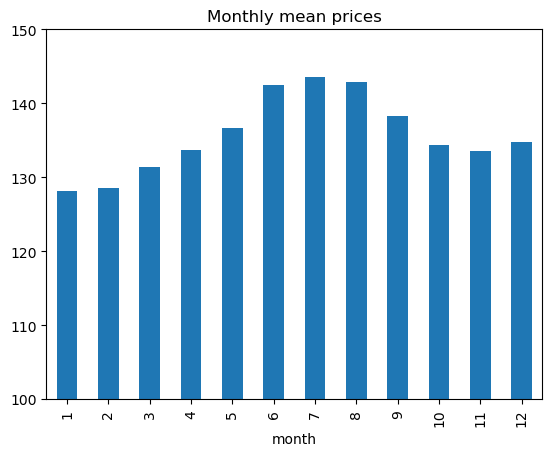

In [4]:
calendar['price'] = calendar['price'].fillna(mean_vals)
calendar['date']=pd.to_datetime(calendar['date'])
calendar['month']=calendar['date'].dt.month
month_mean_price=calendar.groupby('month')['price'].mean()

plt.title("Monthly mean prices")
month_mean_price.plot(kind='bar')
plt.ylim(100,150)

## What are the busiest times of the year?

In order to understand which are the busiest times of the year we should get from the calendar table only busy dates where available column is false and plotting most booked months.


<Axes: title={'center': 'Busiest times of the year'}>

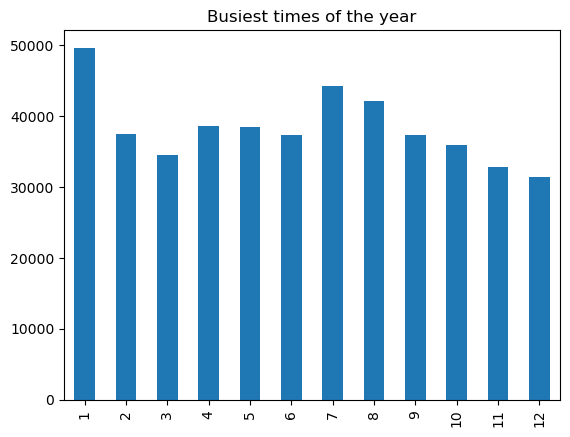

In [5]:
calendar_not_avail=calendar[calendar['available']=='f']

plt.title("Busiest times of the year")
calendar_not_avail['month'].value_counts().sort_index().plot(kind='bar')

Clearly, January is the most preferred time to travel in Seattle, and as we observed earlier, it also had the lowest mean price. Following January, July and August are the next preferred months, despite being the most expensive. This analysis allows us to gain insights into changing tourist demand over time.
